In [3]:
import os
import sys

def is_colab():
    return 'google.colab' in sys.modules

if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    PROJECT_PATH = '/content/drive/MyDrive/MEC_Stackelberg_Project'
else:
    # 自动根据当前脚本定位项目根路径
    PROJECT_PATH = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) \
        if '__file__' in globals() else os.path.abspath(os.path.join(os.getcwd(), '..'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)

print(f"项目路径设置为: {PROJECT_PATH}")

项目路径设置为: c:\Users\a1831\Desktop\MEC_Stackelberg_Project


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

import src.models as models
import src.config as config
import src.run_experiment as run_experiment
import src.utils as utils
import src.algorithms.Stackelberg_solver as stackelberg_solver
import src.algorithms.user_game_solver as user_game_solver
import src.algorithms.baseline_solver as baseline_solver
import src.algorithms.previous_work as previous_work

SEED = 43

In [5]:
COMPUTE_USER_PATH = os.path.join(PROJECT_PATH, "configs", "compute_user.json")
compute_config = config.Config(COMPUTE_USER_PATH)
TRANSMIT_USER_PATH = os.path.join(PROJECT_PATH, "configs", "transmit_user.json")
transmit_config = config.Config(TRANSMIT_USER_PATH)

compute_users = run_experiment.create_users(compute_config,SEED,True)
transmit_users = run_experiment.create_users(transmit_config,SEED,True)
provider = run_experiment.create_provider(compute_config)
users = compute_users + transmit_users


In [6]:
for i,u in enumerate(users):
    u.user_id = i
    print(u.user_id)
    u.print_user()
    u.print_bounds(1e-1,1e-1)
    u.print_costs(1e-1,1e-1)
provider.print_providers()

0
 task: d= 5.0  b= 8.0  alpha= 10.0
 local cpu= 0.5
 S_i= 29.35127707894157
 f_{thres}_ 0 = 0.5055340817484932  B_{thres}_ 0 = 0.028532898370698945
 f_{hat}_ 0 = 22.360679774997898  B_{hat}_ 0 = 5.220733113019665
 C^l_ 0 = 100.0  C_hat_e_ 0 = 5.516282577603513
 C_{hat}_ef_ 0 = 4.47213595499958  C_{hat}_eb_ 0 = 1.044146622603933
1
 task: d= 5.0  b= 8.0  alpha= 10.0
 local cpu= 0.5
 S_i= 31.75781288118785
 f_{thres}_ 1 = 0.5053278666368755  B_{thres}_ 1 = 0.026370679663685337
 f_{hat}_ 1 = 22.360679774997898  B_{hat}_ 1 = 5.01902895032063
 C^l_ 1 = 100.0  C_hat_e_ 1 = 5.475941745063706
 C_{hat}_ef_ 1 = 4.47213595499958  C_{hat}_eb_ 1 = 1.003805790064126
2
 task: d= 5.0  b= 8.0  alpha= 10.0
 local cpu= 0.5
 S_i= 29.372148451780856
 f_{thres}_ 2 = 0.5055321842770866  B_{thres}_ 2 = 0.028512622750156424
 f_{hat}_ 2 = 22.360679774997898  B_{hat}_ 2 = 5.218877899204692
 C^l_ 2 = 100.0  C_hat_e_ 2 = 5.515911534840518
 C_{hat}_ef_ 2 = 4.47213595499958  C_{hat}_eb_ 2 = 1.0437755798409385
3
 tas

In [7]:
pe_or, pn_or, X_or, U_or, results_or = baseline_solver.oracle_baseline_greedy(users, provider, (1e-3,20), (1e-3,20), 500)
print("pe_oracle, pn_oracle=", pe_or, pn_or)
print(f"X_oracle={X_or}, U_oracle={U_or}")

c:\Users\a1831\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Pos

KeyboardInterrupt: 

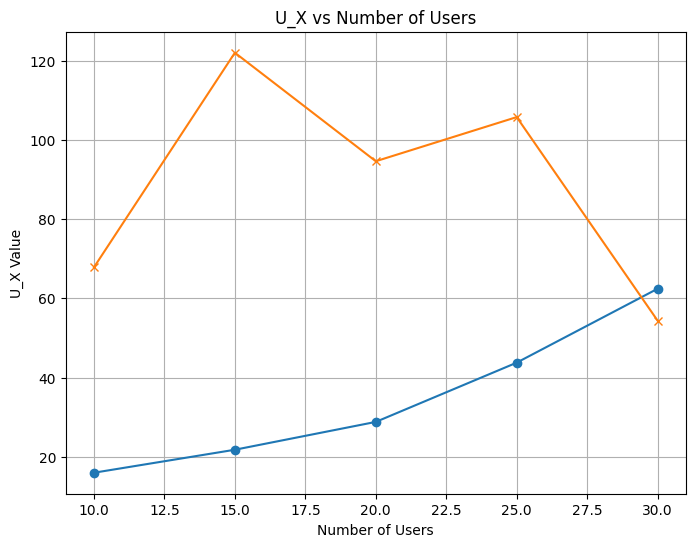

In [ ]:
# 读取 JSON 文件中的实验结果
result_paths = [TU_JSON_PATH,EPF_JSON_PATH,BNB_JSON_PATH,RAND_JSON_PATH,ORACLE_JSON_PATH]
markers=['o','x','v','p','s']

plt.figure(figsize=(8,6))
for i,path in enumerate(result_paths):
    with open(path, "r", encoding="utf-8") as f:
        sweep_results = json.load(f)
    # 提取横轴（num_user）和纵轴（U_X）数据
    num_users = []
    U_X = []
    for res in sweep_results:
        # 假设 sweep_param 为 "num_user"，sweep_value 就是用户数量
        num_users.append(res["sweep_value"])
        U_X.append(res["sp_info"]["U_X"])
    # 如果数据无序，可以先排序
    num_users, U_X = zip(*sorted(zip(num_users, U_X), key=lambda x: x[0]))
    # 绘图
    plt.plot(num_users, U_X, marker=markers[i], linestyle="-")

plt.xlabel("Number of Users")
plt.ylabel("$U_E+U_N$")
# plt.title("U_X vs Number of Users")
plt.grid(True)
plt.show()